In [1]:
import numpy as np
from matplotlib.pyplot import *
from pickle import dump,load,HIGHEST_PROTOCOL
from os import chdir

In [2]:
def load_pkl(output_path,name):
    with open(output_path + name + '.pkl', 'rb') as f:
        return load(f)
    
module_path = 'C:\\...\\' #put the path of the TW modules here
data_path = 'C:\\...\\' #put the path where you put the data here
chdir(module_path)

In [3]:
from make_wavelet import *
from TW_analysis_complex_valued_unit_length_phase import *

In [4]:
nBases = 2
N_cycles = 2
tdel = 2.0
frequency = 9.2
minf = 9.2 #if you analyse multiple frequencies, put the lowest frequency here
data_cts = load_pkl(data_path,'avref_timeseries')
contact_xyz = load_pkl(data_path,'xyz_coordinates')

In [5]:
power_cts,phi_cts = wavelet(data_cts,N_cycles,frequency,tdel,minf)
print(phi_cts.shape)

(13, 3442, 64)


In [6]:
bases_sb,fit_ct,betas_ctb = C_TW_bases_betas(phi_cts,nBases=nBases)
print(bases_sb.shape,fit_ct.shape,betas_ctb.shape)

[9.83507134 7.43418553]
(64, 2) (13, 3442) (13, 3442, 2)


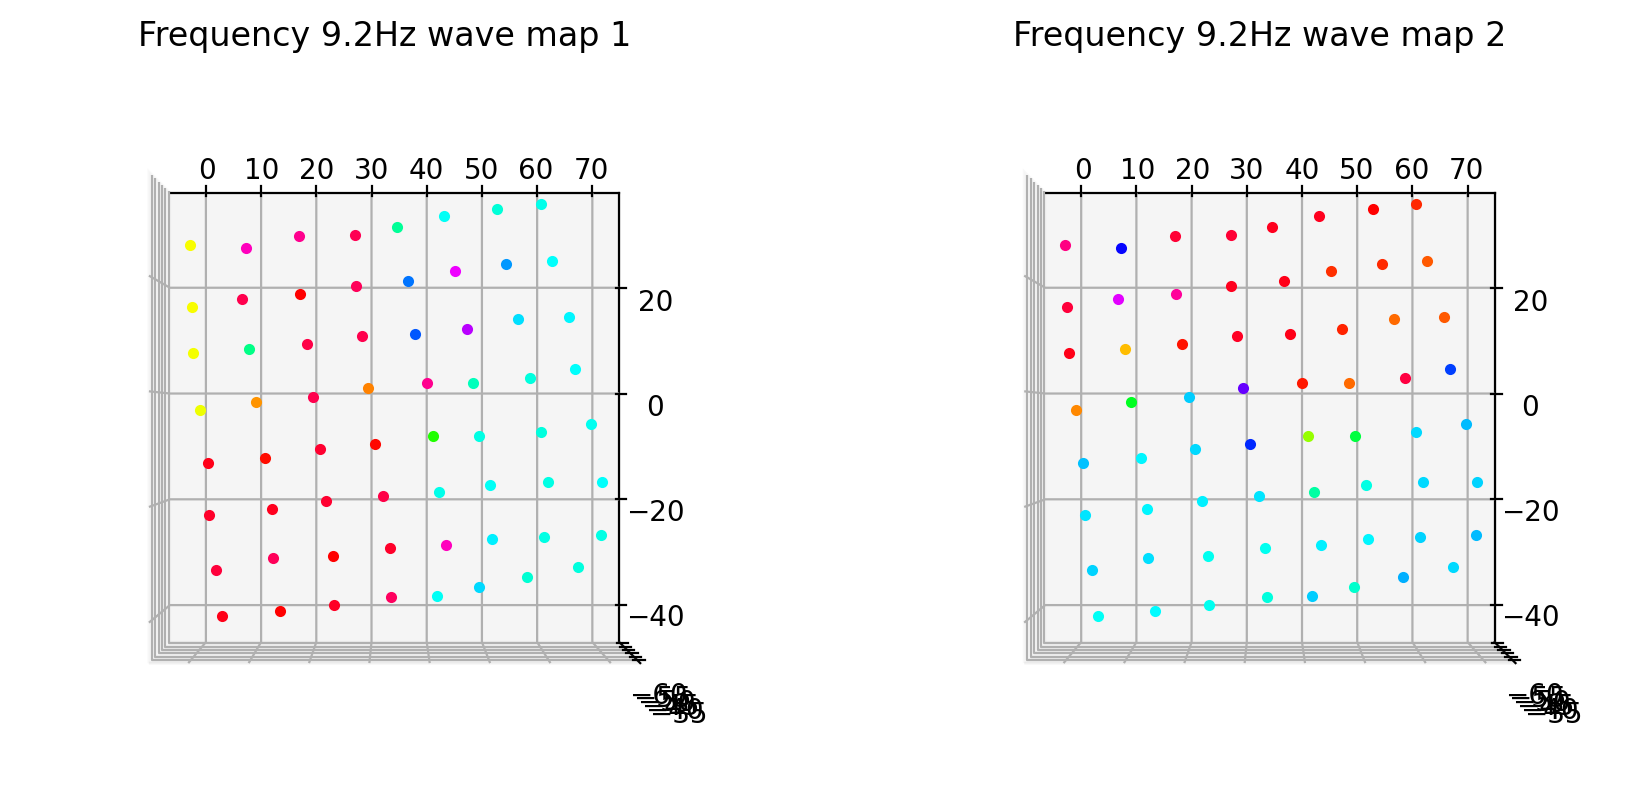

In [7]:
fig = figure(figsize=(nBases*8,8),dpi=200)
axs = []
for b in range(nBases):
    axs += [fig.add_subplot(1,3,b+1,projection='3d')]
    axs[b].view_init(elev=90,azim=-90)
    axs[b].set_title('Frequency %.1fHz wave map %d'%(frequency,b+1))
    for s,xyz in enumerate(contact_xyz):
        color = cm.hsv(np.angle(bases_sb[s,b]) / (2.0*np.pi) + 0.5) #put angles on range 0 to 1
        axs[b].plot(xyz[0],xyz[1],xyz[2],'.',color=color)